In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# loading data

In [ ]:
actual_train_data = pd.read_csv('house_pred_train.csv')
test_data = pd.read_csv('house_pred_test.csv')

In [ ]:
comb_data = pd.concat([actual_train_data,test_data],axis=0)
train_data = comb_data.copy()

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
#checking columns info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
#checking null values
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

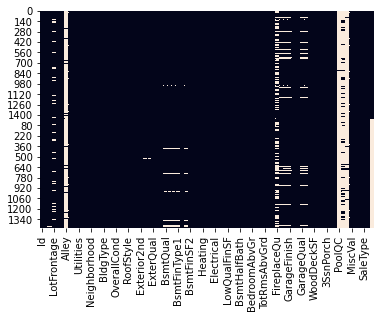

In [ ]:
sns.heatmap(train_data.isnull(),cbar=False)

In [ ]:
# here whilte line in the shows that these are all missing values
# where missing value is more thean 50% let's drop them


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# removing null values which is more than 50%

In [ ]:
# getting columns where null value is greater than 50%
def fifty_data_null_columns(data):
  null_data = data.isnull().sum().to_frame()
  null_columns = []
  for i in range(len(null_data)):
    if null_data[0][i] > (data.shape[0]/2):
      null_columns.append(null_data.index[i])
  return null_columns

In [ ]:
train_null_columns = fifty_data_null_columns(train_data)
#test_null_columns = data_after_drop_null(test_data)


In [ ]:
#dropping null columns:
train_data.drop(train_null_columns, axis=1,inplace=True)

In [ ]:
train_data.shape

(2919, 77)

### handling rest_of_null_values

In [ ]:
def contains_null_value(data):
  null_data = data.isnull().sum().to_frame()
  null_value_columns = []
  for i in range(len(null_data)):
    if null_data[0][i] > 0:
      null_value_columns.append(null_data.index[i])
  return null_value_columns

In [ ]:
#getting columns which contains null value
train_null_columns_val = contains_null_value(train_data)
train_null_columns_val

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SalePrice']

In [ ]:
train_data[train_null_columns_val].isnull().sum()

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

In [ ]:
train_data[train_null_columns_val].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Utilities     2917 non-null   object 
 3   Exterior1st   2918 non-null   object 
 4   Exterior2nd   2918 non-null   object 
 5   MasVnrType    2895 non-null   object 
 6   MasVnrArea    2896 non-null   float64
 7   BsmtQual      2838 non-null   object 
 8   BsmtCond      2837 non-null   object 
 9   BsmtExposure  2837 non-null   object 
 10  BsmtFinType1  2840 non-null   object 
 11  BsmtFinSF1    2918 non-null   float64
 12  BsmtFinType2  2839 non-null   object 
 13  BsmtFinSF2    2918 non-null   float64
 14  BsmtUnfSF     2918 non-null   float64
 15  TotalBsmtSF   2918 non-null   float64
 16  Electrical    2918 non-null   object 
 17  BsmtFullBath  2917 non-null   float64
 18  BsmtHalfBath  2917 non-null 

In [ ]:
train_data[train_null_columns_val].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,2433.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000,1460.000000
mean,69.305795,102.201312,441.423235,49.582248,560.772104,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572,180921.195890
std,23.344905,179.334253,455.610826,169.205611,439.543659,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815,79442.502883
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,34900.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000,129975.000000
50%,68.000000,0.000000,368.500000,0.000000,467.000000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000,163000.000000
75%,80.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,214000.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,755000.000000


In [ ]:
train_data[train_null_columns_val].describe(include='object')


,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
count,2915,2917,2918,2918,2895,2838,2837,2837,2840,2839,2918,2918,2917,1499,2762,2760,2760,2760,2918
unique,5,2,15,16,4,4,4,4,6,6,5,4,7,5,6,3,5,5,9
top,RL,AllPub,VinylSd,VinylSd,None,TA,TA,No,Unf,Unf,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,WD
freq,2265,2916,1025,1014,1742,1283,2606,1904,851,2493,2671,1492,2717,744,1723,1230,2604,2654,2525


In [ ]:
def fill_null_columns(data,columns):
  # checing if the type of column is object or interget
  for col in columns:
    if data[col].dtype == 'O':
      data[col] = data[col].fillna(data[col].mode()[0])
    else:
      data[col] = data[col].fillna(data[col].mean())

  return data



In [ ]:
train_data = fill_null_columns(train_data,train_null_columns_val)


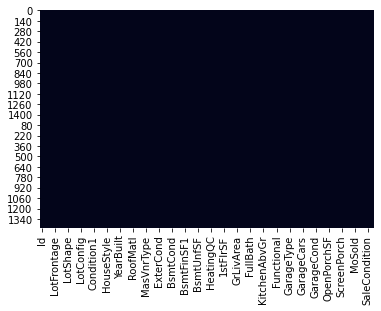

In [ ]:
sns.heatmap(train_data.isnull(), cbar = False)

# feature enginerring

# contibous numerical value

In [ ]:
# taking continous numerical columns
cont_num_col = [col for col in train_data.columns if len(train_data[col].unique())>25]
cont_num_col = [col for col in cont_num_col if 'Yr' not in col and 'Year' not in col and col != 'Id' ] #deleting temporal features from it
cont_num_col.remove('SalePrice')
cont_num_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [ ]:
# checking for outlier using boxplot
def outlier_check(data,column):
  i = 0
  fig, axs = plt.subplots(2,2, figsize=(15, 8), facecolor='w', edgecolor='k')
  fig.subplots_adjust(hspace = .5, wspace=.001)

  axs = axs.ravel()

  for feature in column:
    dataset = data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        axs[i].boxplot(dataset[feature])
        axs[i].set_ylabel(feature)
        axs[i].set_title(feature)
        i = i +1 
        

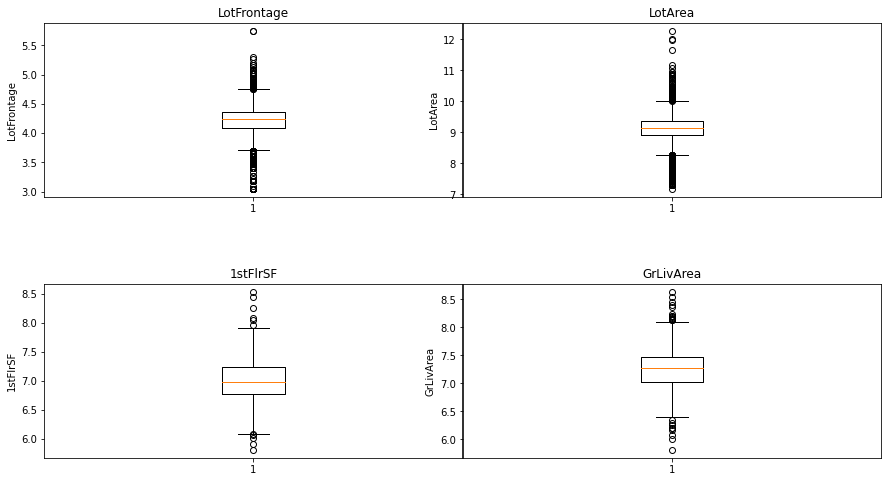

In [ ]:
outlier_check(train_data,cont_num_col)

In [ ]:
# handling outliers
def removing_outliers(data,col):
  
  dataset = data.copy()
  for feature in col:
   
    if 0 in dataset[feature].unique():
      pass
    else:
      min = dataset[feature].quantile(0.25)
      max = dataset[feature].quantile(0.75)
      dataset.loc[dataset[feature] < min, feature] = min
      dataset.loc[dataset[feature]>max, feature] = max

  return dataset 
  



In [ ]:
act_train_data = train_data.copy()


In [ ]:
train_data = removing_outliers(train_data,cont_num_col)

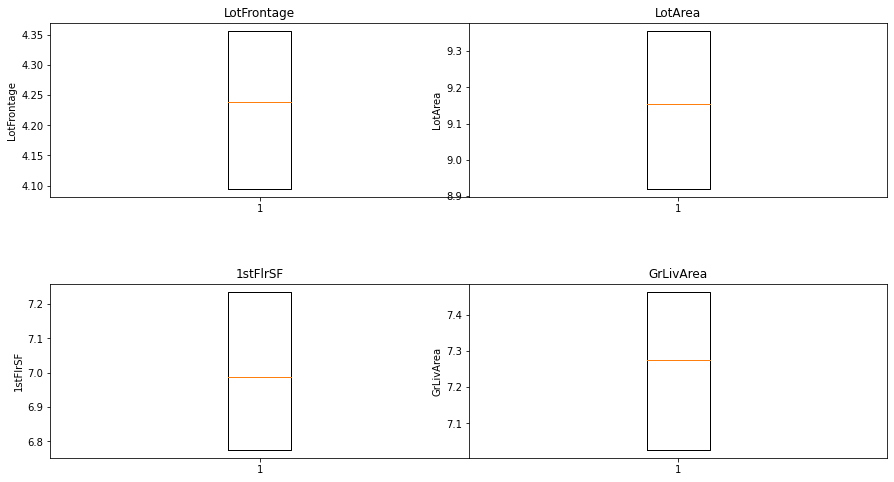

In [ ]:
outlier_check(train_data,cont_num_col)

In [ ]:
def cont_analysis(data,column):
    fig, axs = plt.subplots(5,4, figsize=(20, 8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=0.8)
    i = 0
    axs = axs.ravel()
    for feature in column:
        axs[i].scatter(data[feature],data['SalePrice'])
        axs[i].set_ylabel('SalePrice')
        axs[i].set_xlabel(feature)
        i = i +1 


In [ ]:
len(cont_num_col)

18

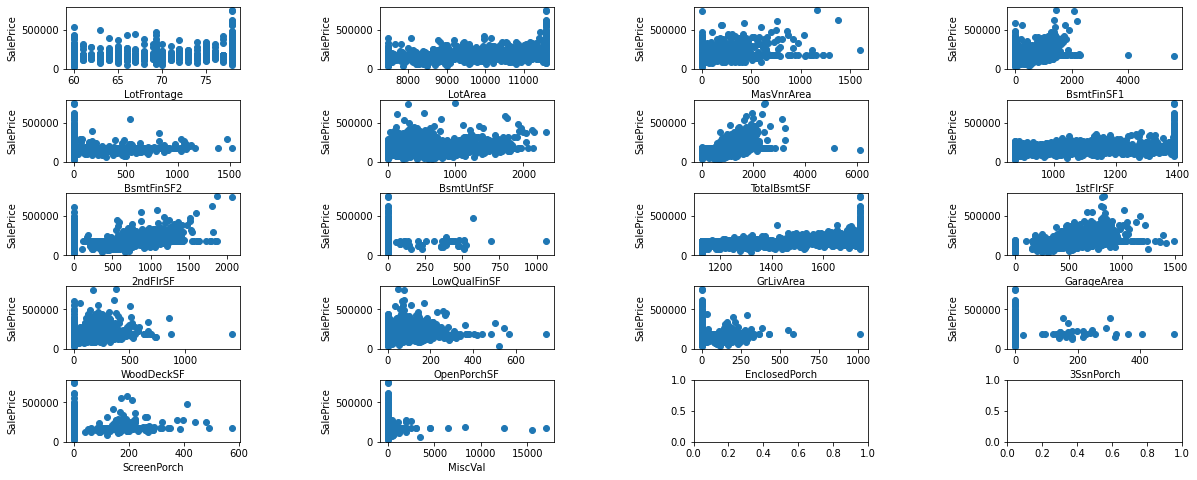

In [ ]:
cont_analysis(train_data,cont_num_col)

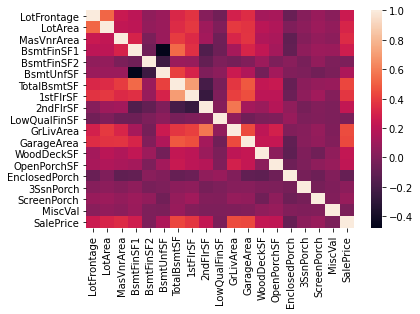

In [ ]:
corr_matrix = train_data[cont_num_col+ ['SalePrice']].corr()
sns.heatmap(corr_matrix)

In [ ]:
# checking where corr_value is greater than 0.5
corr_matrix

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
LotFrontage,1.000000,0.526016,0.254223,0.203598,0.056490,0.090536,0.322426,0.370498,0.022488,-0.044739,0.294473,0.344076,0.123226,0.140033,-0.073905,0.021785,0.086337,0.032709,0.256267
LotArea,0.526016,1.000000,0.225655,0.212286,0.065508,0.092309,0.336637,0.386980,0.101154,-0.003470,0.391221,0.368330,0.199097,0.165078,-0.001492,0.042229,0.097202,0.063400,0.308619
MasVnrArea,0.254223,0.225655,1.000000,0.301999,-0.015633,0.089712,0.395632,0.331399,0.120454,-0.057910,0.318738,0.372865,0.165839,0.143659,-0.111156,0.013611,0.065188,0.044810,0.339679
BsmtFinSF1,0.203598,0.212286,0.301999,1.000000,-0.055045,-0.477404,0.536467,0.358335,-0.162284,-0.066028,0.129474,0.310403,0.223471,0.124153,-0.099710,0.050908,0.096821,0.093295,0.273579
BsmtFinSF2,0.056490,0.065508,-0.015633,-0.055045,1.000000,-0.238241,0.089410,0.080346,-0.097734,-0.004923,-0.037934,0.003139,0.098389,-0.005875,0.032739,-0.023279,0.063301,-0.005139,-0.007672
BsmtUnfSF,0.090536,0.092309,0.089712,-0.477404,-0.238241,1.000000,0.412285,0.301939,-0.000376,0.046913,0.260608,0.164377,-0.039298,0.119753,0.005006,-0.005810,-0.049157,-0.010492,0.152487
TotalBsmtSF,0.322426,0.336637,0.395632,0.536467,0.089410,0.412285,1.000000,0.702349,-0.205643,-0.023359,0.379157,0.485984,0.229579,0.245500,-0.085508,0.037892,0.075362,0.084001,0.431912
1stFlrSF,0.370498,0.386980,0.331399,0.358335,0.080346,0.301939,0.702349,1.000000,-0.263416,-0.003971,0.411134,0.452391,0.204870,0.203749,-0.070275,0.049412,0.113817,0.017236,0.376733
2ndFlrSF,0.022488,0.101154,0.120454,-0.162284,-0.097734,-0.000376,-0.205643,-0.263416,1.000000,0.017803,0.576728,0.128534,0.089922,0.185387,0.054645,-0.032458,0.011070,-0.005299,0.229926
LowQualFinSF,-0.044739,-0.003470,-0.057910,-0.066028,-0.004923,0.046913,-0.023359,-0.003971,0.017803,1.000000,0.058493,-0.053551,-0.015622,-0.000692,0.087212,-0.004545,0.006835,-0.005973,-0.018975


In [ ]:
# remvoing columns which doesn't effect saleprice i.e have less correlation with it
#TOtalBSMTSF and 1stFlrSF are highly correlated and
less_dep_cont_num_feat = ['BsmtFinSF2','EnclosedPorch','ScreenPorch','1stFlrSF','LowQualFinSF','3SsnPorch','MiscVal']
train_data.drop(less_dep_cont_num_feat,axis=1,inplace=True)



In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train_data[feature]=np.log(train_data[feature])

# discrete_cont_variable

In [ ]:
cont_dis_col = [col for col in train_data.columns if len(train_data[col].unique())<25 and train_data[col].dtype != 'O' and 'Yr' not in col]


In [ ]:
# checching analysis of saleprice on them
def discrete_analysis(data,column):
    fig, axs = plt.subplots(5,4, figsize=(20, 12), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 1.0, wspace=1.2,)
    i = 0
    axs = axs.ravel()
    dataset = data.copy()
    for feature in column:
        #dataset.groupby(feature)['SalePrice'].median().plot.bar(axis=axs[i])
        dataset.groupby(feature)['SalePrice'].median().plot(ax=axs[i],kind='bar')
        axs[i].set_ylabel('SalePrice')
        axs[i].set_xlabel(feature)
        i = i +1

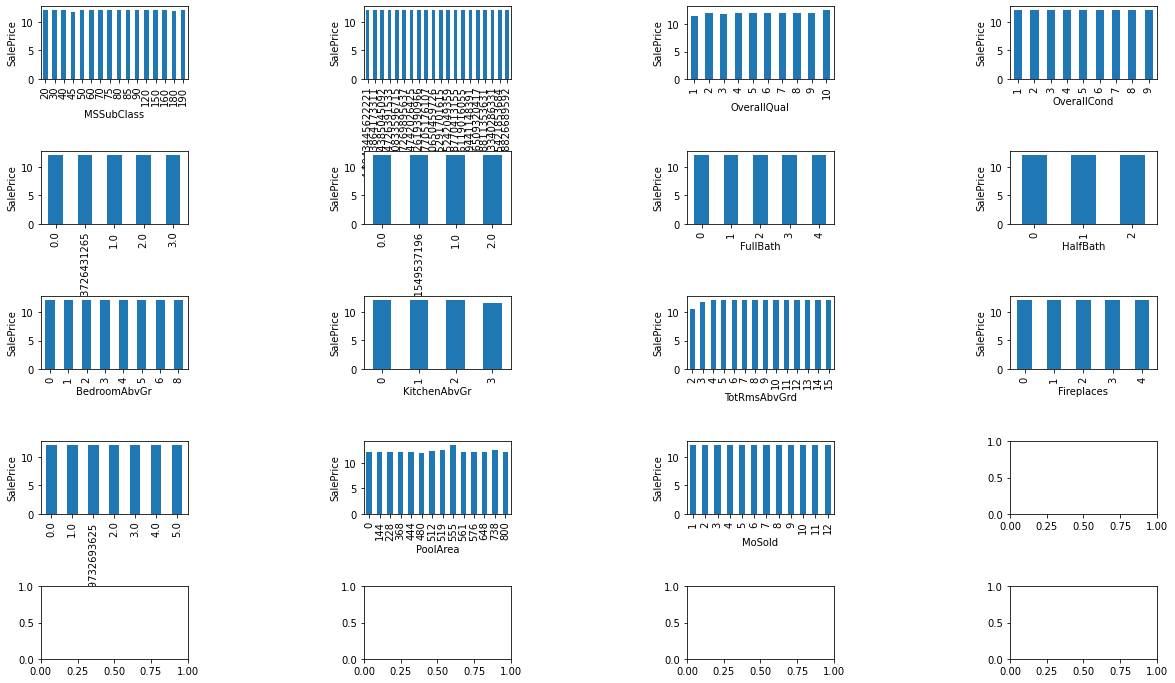

In [ ]:
discrete_analysis(train_data,cont_dis_col)

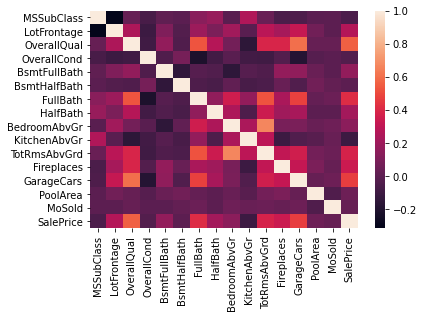

In [ ]:
corr_matrix_dis = train_data[cont_dis_col+['SalePrice']].corr()
sns.heatmap(corr_matrix_dis)

In [ ]:
corr_matrix_dis

,MSSubClass,LotFrontage,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice
MSSubClass,1.000000,-0.314722,0.033638,-0.065625,0.009947,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,-0.046596,-0.003080,-0.001231,-0.050682
LotFrontage,-0.314722,1.000000,0.248091,-0.106628,0.109727,-0.028115,0.198179,0.097728,0.210542,-0.010190,0.287273,0.228016,0.322134,0.066774,-0.000205,0.270691
OverallQual,0.033638,0.248091,1.000000,-0.093847,0.164465,-0.040713,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.600682,0.030740,0.030405,0.559903
OverallCond,-0.065625,-0.106628,-0.093847,1.000000,-0.042109,0.084133,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.181783,-0.016876,-0.006256,-0.027179
BsmtFullBath,0.009947,0.109727,0.164465,-0.042109,1.000000,-0.148832,-0.018790,-0.033456,-0.154991,-0.017931,-0.038844,0.169419,0.161660,0.043970,-0.003567,0.164777
BsmtHalfBath,-0.001878,-0.028115,-0.040713,0.084133,-0.148832,1.000000,-0.046984,-0.058417,0.018823,-0.064915,-0.049518,0.039227,-0.033455,0.066851,0.023011,-0.001267
FullBath,0.139140,0.198179,0.528483,-0.215504,-0.018790,-0.046984,1.000000,0.158386,0.356125,0.170958,0.527337,0.235927,0.479938,0.028091,0.046274,0.415442
HalfBath,0.178750,0.097728,0.272668,-0.088577,-0.033456,-0.058417,0.158386,1.000000,0.245318,-0.042691,0.345572,0.205876,0.234518,0.001424,-0.001136,0.218991
BedroomAbvGr,-0.008796,0.210542,0.073075,-0.008477,-0.154991,0.018823,0.356125,0.245318,1.000000,0.241182,0.669737,0.086793,0.092875,0.036544,0.055997,0.143979
KitchenAbvGr,0.260155,-0.010190,-0.159325,-0.086700,-0.017931,-0.064915,0.170958,-0.042691,0.241182,1.000000,0.294569,-0.107892,-0.037060,-0.013116,0.035493,-0.107448


In [ ]:
# dropping columns which are less dependent
less_dep_cont_dis_feat = ['MSSubClass','OverallCond','BsmtHalfBath','MoSold','BedroomAbvGr']
train_data.drop(less_dep_cont_dis_feat,axis=1,inplace=True)


#temporal variable

In [ ]:
temp_col = [col for col in train_data.columns if 'Year' in col or 'Yr' in col]
temp_col


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
def temporal_analysis(data,column):
    fig, axs = plt.subplots(1,4, figsize=(20, 5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 1.0, wspace=0.5)
    i = 0
    axs = axs.ravel()
    dataset = data.copy()
    for feature in column:
        #dataset.groupby(feature)['SalePrice'].median().plot.bar(axis=axs[i])
        dataset.groupby(feature)['SalePrice'].median().plot(ax=axs[i],kind='line')
        axs[i].set_ylabel('SalePrice')
        axs[i].set_xlabel(feature)
        i = i +1

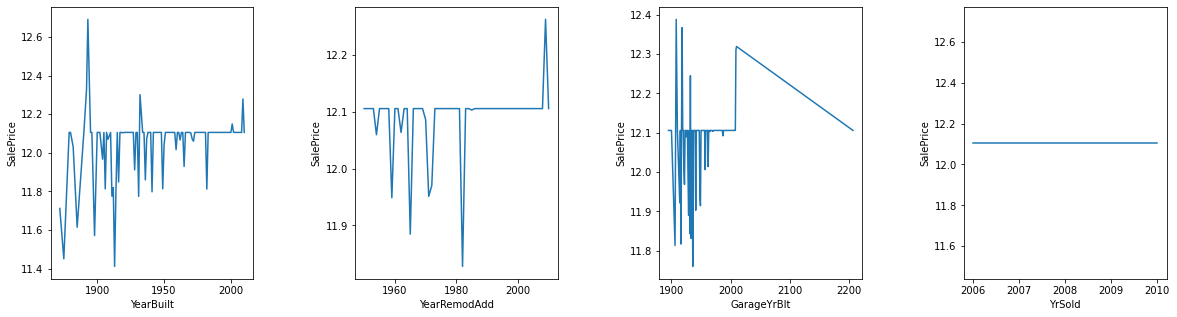

In [ ]:
temporal_analysis(train_data,temp_col)

In [ ]:
corr_matrix_temp = train_data[temp_col+['SalePrice']].corr()
corr_matrix_temp

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice
YearBuilt,1.000000,0.612235,0.790032,-0.012344,0.409502
YearRemodAdd,0.612235,1.000000,0.627270,0.033203,0.386978
GarageYrBlt,0.790032,0.627270,1.000000,-0.004413,0.336602
YrSold,-0.012344,0.033203,-0.004413,1.000000,-0.028846
SalePrice,0.409502,0.386978,0.336602,-0.028846,1.000000


In [ ]:
def diff_temp_col(data,col):
  dataset = data.copy()

  for feature in col:
      if feature!='YrSold':
          ## We will capture the difference between year variable and year the house was sold for
          dataset[feature]=dataset['YrSold']-dataset[feature]

  return dataset

In [ ]:
train_data = diff_temp_col(train_data,temp_col)

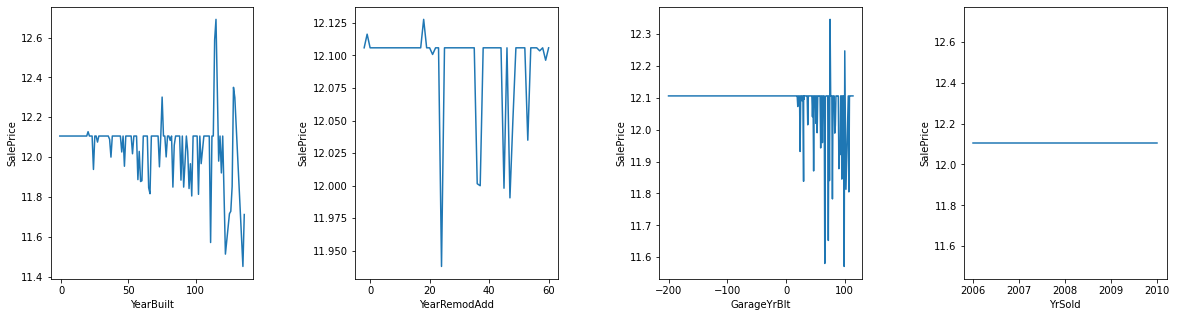

In [ ]:
temporal_analysis(train_data,temp_col)

In [ ]:
#drooping yrsold column as it is already taken in account
train_data.drop(['YrSold'],axis=1,inplace=True)

# categorical variable

In [ ]:
category_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
len(category_col)

39

In [ ]:
def discrete_analysis(data,column):
    fig, axs = plt.subplots(7,6, figsize=(30,25 ), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 1.0, wspace=0.5,)
    i = 0
    axs = axs.ravel()
    dataset = data.copy()
    for feature in column:
        #dataset.groupby(feature)['SalePrice'].median().plot.bar(axis=axs[i])
        dataset.groupby(feature)['SalePrice'].median().plot(ax=axs[i],kind='bar')
        axs[i].set_ylabel('SalePrice')
        axs[i].set_xlabel(feature)
        i = i +1

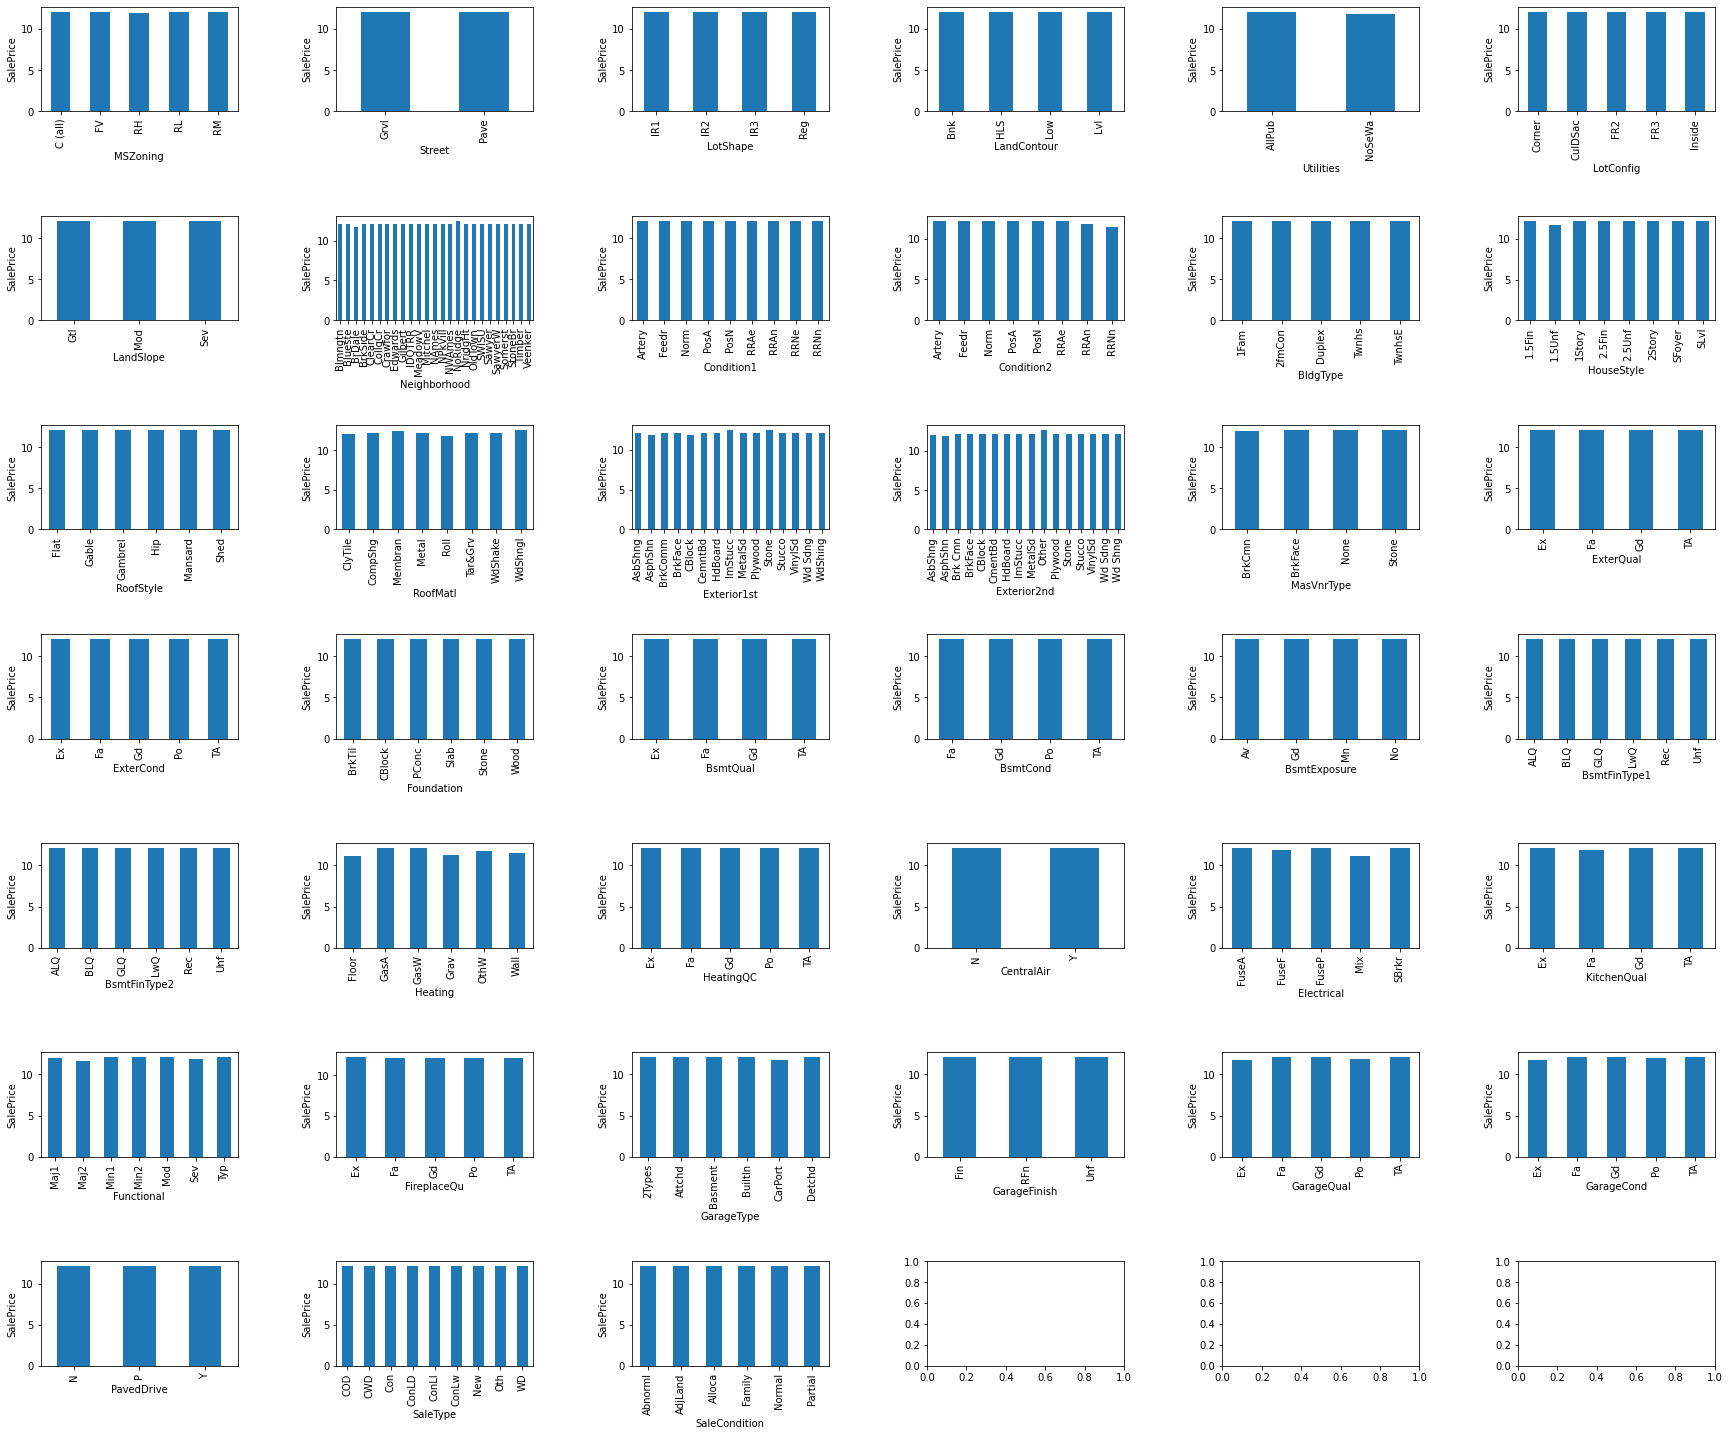

In [ ]:
discrete_analysis(train_data,category_col)

In [ ]:
# handling rare variables
#for feature in category_col:
#    temp=train_data.groupby(feature)['SalePrice'].count()/len(train_data)
#    temp_df=temp[temp>0.01].index
#    train_data[feature]=np.where(train_data[feature].isin(temp_df),train_data[feature],'Rare_var')

In [ ]:
# mapping them to intetger
#for feature in category_col:
#    labels_ordered=train_data.groupby([feature])['SalePrice'].mean().sort_values().index
#    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
#    train_data[feature]=train_data[feature].map(labels_ordered)

In [ ]:
train_data.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,SaleType,SaleCondition,SalePrice
0,1,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,854,7.444249,1.0,2,1,1,Gd,8,Typ,0,Gd,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,WD,Normal,12.247694
1,2,RL,4.356709,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,0,7.140453,0.0,2,0,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,WD,Normal,12.109011
2,3,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,866,7.463650,1.0,2,1,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,WD,Normal,12.317167
3,4,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,756,7.448334,1.0,1,0,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,0,WD,Abnorml,11.849398
4,5,RL,4.356709,9.356171,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1053,7.463650,1.0,2,1,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,WD,Normal,12.429216


# scailing all the numerical variables

In [ ]:
feature_scale=[feature for feature in train_data.columns if feature not in ['Id','SalePrice'] and train_data[feature].dtype != 'O']

len(feature_scale)

23

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x  = train_data.copy()
x = train_data = pd.concat([train_data[category_col+['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
train_data = x
train_data.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,SalePrice,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,1,12.247694,0.305082,0.279989,0.666667,0.043796,0.112903,0.12250,0.125089,0.064212,0.140098,0.413559,0.955626,0.333333,0.5,0.5,0.333333,0.461538,0.00,0.652866,0.4,0.368280,0.00000,0.082210,0.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,2,12.109011,1.000000,0.572340,0.555556,0.233577,0.532258,0.00000,0.173281,0.121575,0.206547,0.000000,0.260796,0.000000,0.5,0.0,0.333333,0.307692,0.25,0.735669,0.4,0.309140,0.20927,0.000000,0.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,3,12.317167,0.477059,0.935737,0.666667,0.058394,0.129032,0.10125,0.086109,0.185788,0.150573,0.419370,1.000000,0.333333,0.5,0.5,0.333333,0.307692,0.25,0.659236,0.4,0.408602,0.00000,0.056604,0.0


# handling categorical values i.e to dummies






In [ ]:
def get_one_dummy(data,columns):
  for col in columns:
    dum = pd.get_dummies(data[col],drop_first = True,prefix=col)  # dropping 1st unique as it is obvious
    data.drop(col,axis=1,inplace=True)   # dropping the actual column of which we have created dummies
    data = pd.concat([data,dum],axis=1)  #concatenate data and dummy data into data

  return data

In [ ]:
act_train_data = train_data.copy()
train_data = get_one_dummy(act_train_data,category_col)

In [ ]:
train_data.shape

(2919, 225)

In [ ]:
train_data.head()

,Id,SalePrice,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,12.247694,0.305082,0.279989,0.666667,0.043796,0.112903,0.12250,0.125089,0.064212,0.140098,0.413559,0.955626,0.333333,0.50,0.5,0.333333,0.461538,0.00,0.652866,0.4,0.368280,0.000000,0.082210,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,12.109011,1.000000,0.572340,0.555556,0.233577,0.532258,0.00000,0.173281,0.121575,0.206547,0.000000,0.260796,0.000000,0.50,0.0,0.333333,0.307692,0.25,0.735669,0.4,0.309140,0.209270,0.000000,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,12.317167,0.477059,0.935737,0.666667,0.058394,0.129032,0.10125,0.086109,0.185788,0.150573,0.419370,1.000000,0.333333,0.50,0.5,0.333333,0.307692,0.25,0.659236,0.4,0.408602,0.000000,0.056604,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,11.849398,0.000000,0.560375,0.666667,0.671533,0.612903,0.00000,0.038271,0.231164,0.123732,0.366102,0.964970,0.333333,0.25,0.0,0.333333,0.384615,0.25,0.662420,0.6,0.431452,0.000000,0.047170,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,12.429216,1.000000,1.000000,0.777778,0.065693,0.161290,0.21875,0.116052,0.209760,0.187398,0.509927,1.000000,0.333333,0.50,0.5,0.333333,0.538462,0.25,0.662420,0.6,0.561828,0.134831,0.113208,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#featureselesction

In [ ]:
#featureselection
training_data = train_data[:1460]
testing_data = train_data[1460:]

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train=training_data.drop(['Id','SalePrice'],axis=1)
y_train=training_data[['SalePrice']]
X_test=testing_data.drop(['Id','SalePrice'],axis=1)

In [ ]:
X_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.305082,0.279989,0.666667,0.043796,0.112903,0.12250,0.125089,0.064212,0.140098,0.413559,0.955626,0.333333,0.50,0.5,0.333333,0.461538,0.00,0.652866,0.4,0.368280,0.000000,0.082210,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1.000000,0.572340,0.555556,0.233577,0.532258,0.00000,0.173281,0.121575,0.206547,0.000000,0.260796,0.000000,0.50,0.0,0.333333,0.307692,0.25,0.735669,0.4,0.309140,0.209270,0.000000,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.477059,0.935737,0.666667,0.058394,0.129032,0.10125,0.086109,0.185788,0.150573,0.419370,1.000000,0.333333,0.50,0.5,0.333333,0.307692,0.25,0.659236,0.4,0.408602,0.000000,0.056604,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.000000,0.560375,0.666667,0.671533,0.612903,0.00000,0.038271,0.231164,0.123732,0.366102,0.964970,0.333333,0.25,0.0,0.333333,0.384615,0.25,0.662420,0.6,0.431452,0.000000,0.047170,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.000000,1.000000,0.777778,0.065693,0.161290,0.21875,0.116052,0.209760,0.187398,0.509927,1.000000,0.333333,0.50,0.5,0.333333,0.538462,0.25,0.662420,0.6,0.561828,0.134831,0.113208,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.0005,random_state=0,)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

#let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 223
selected features: 96


In [ ]:
X_test.shape

(1459, 223)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.305082,0.279989,0.666667,0.043796,0.112903,0.12250,0.125089,0.064212,0.140098,0.413559,0.955626,0.333333,0.50,0.5,0.333333,0.461538,0.00,0.652866,0.4,0.368280,0.000000,0.082210,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1.000000,0.572340,0.555556,0.233577,0.532258,0.00000,0.173281,0.121575,0.206547,0.000000,0.260796,0.000000,0.50,0.0,0.333333,0.307692,0.25,0.735669,0.4,0.309140,0.209270,0.000000,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.477059,0.935737,0.666667,0.058394,0.129032,0.10125,0.086109,0.185788,0.150573,0.419370,1.000000,0.333333,0.50,0.5,0.333333,0.307692,0.25,0.659236,0.4,0.408602,0.000000,0.056604,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.000000,0.560375,0.666667,0.671533,0.612903,0.00000,0.038271,0.231164,0.123732,0.366102,0.964970,0.333333,0.25,0.0,0.333333,0.384615,0.25,0.662420,0.6,0.431452,0.000000,0.047170,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.000000,1.000000,0.777778,0.065693,0.161290,0.21875,0.116052,0.209760,0.187398,0.509927,1.000000,0.333333,0.50,0.5,0.333333,0.538462,0.25,0.662420,0.6,0.561828,0.134831,0.113208,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### training a model

In [ ]:
# removing duplicated columns from train_data
#train_data = train_data.loc[:,~train_data.columns.duplicated()]

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   41.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 12.2min finished


[08:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.25, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=2, min_child_weight=4,
                                          missing=None, n_estimators=900,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alph...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv.best_estimator_


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#simpl dummy and first model
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(X_train,y_train)

[08:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred = regressor.predict(X_train)
from sklearn.metrics import mean_squared_error
print('RMSE on training set of log of values ', np.sqrt(mean_squared_error((y_train),(Y_pred))))

rrrr is  0.08826883933298603


In [ ]:
print('RMSE on training set on actual values is ', np.sqrt(mean_squared_error(np.exp(y_train),np.exp(Y_pred))))

rrrr is  15916.670143117473


In [ ]:
np.exp(y_train).mean()

SalePrice    180921.19589
dtype: float64

In [ ]:
test_pred = regressor.predict(X_test)

In [ ]:
test_pred = np.exp(test_pred)

In [ ]:

test_pred

array([117655.945, 159638.34 , 186554.27 , ..., 156818.58 , 120350.664,
       226046.28 ], dtype=float32)

# generating sample submission

In [ ]:
sam_data = pd.DataFrame()


In [ ]:
sam_data['Id'] = test_data['Id']

In [ ]:
sam_data['SalePrice'] = test_pred

In [ ]:
sam_data.head()

,Id,SalePrice
0,1461,117655.945312
1,1462,159638.343750
2,1463,186554.265625
3,1464,193885.875000
4,1465,192778.140625


In [ ]:
sam_data.to_csv('sample_submission8.csv',index=False)


# using pca